In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
# !unrar x "/content/drive/MyDrive/DATATHON/Bases_Partage_csv.rar" "/content/drive/MyDrive/DATATHON/"

In [ ]:
import os
os.listdir('/content/drive/MyDrive/DATATHON/Bases_Partage_csv')

['Emploi_csv', 'Pauvrete_csv']

In [ ]:
# List files in the 'Emploi_csv' directory
os.listdir('/content/drive/MyDrive/DATATHON/Bases_Partage_csv/Emploi_csv')

['ENESI-2012', 'ENESI-2017']

In [ ]:
# List files in the 'Pauvrete_csv' directory
os.listdir('/content/drive/MyDrive/DATATHON/Bases_Partage_csv/Pauvrete_csv')

['EPCV2004', 'data_EPCV2008', 'data_EPCV2014', 'data_EPCV2019']

In [ ]:
for root, dirs, files in os.walk('/content/drive/MyDrive/DATATHON/Bases_Partage_csv'):
    level = root.replace('/content/drive/MyDrive/DATATHON/Bases_Partage_csv', '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    sub_indent = ' ' * 4 * (level + 1)
    for f in files:
        print(f"{sub_indent}{f}")

Bases_Partage_csv/
    Emploi_csv/
        ENESI-2012/
            Questionnaire ménage.pdf
            Questionnaire Individuel.pdf
            programme tabulation DG.sps
            Questionnaire Unité informelle.pdf
            programme taux spécifiques.sps
            AP.csv
            Caractéristiques habitat.csv
            Caractéristiques Individus.csv
            Caractéristiques ménages.csv
            Concurrents et marchés.csv
            DC4 Consolidés.csv
            Depenses et charges consolidées.csv
            fichierUPI.csv
            fichierUPI2.csv
            production vendue consolidée.csv
            Section B Primes et avantages.csv
            Section emploi informel.csv
            Section Equipment Investissement.csv
            Weight-ENRE.csv
        ENESI-2017/
            Questionnaire Individuel_FR_5-12-2016.docx
            ENESI 2017 .pdf
            Questionnaire Ménage_FR_ 01-12-2016.docx
            hh.csv
            hl.csv
      

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/DATATHON/Bases_Partage_csv/Emploi_csv/ENESI-2012/Section emploi informel.csv'

# Load and explore the file
df = pd.read_csv(file_path, on_bad_lines='warn', delimiter=';')
print("Columns:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

Columns:
['I04', 'I01', 'I02', 'I03', 'I06', 'I08', 'I11B', 'B21', 'B2P', 'B2S', 'B2A', 'B2SC', 'B2AP', 'B2AN', 'B31', 'B3ST', 'B3SB', 'B3T', 'B3R', 'B3N', 'B3NB', 'B3RE', 'B41', 'B4P', 'B4A', 'B4C', 'B4PB', 'B4CS', 'B4AS', 'AP4', 'AP1', 'AS2B1', 'AP7', 'AP5', 'AP8C2', 'AP6AA', 'CUP1A', 'CUP1B', 'PV1', 'weiaE', 'CUP1AReduit']

First few rows:
   I04  I01  I02  I03  I06  I08  I11B B21 B2P B2S  ... AS2B1 AP7 AP5 AP8C2  \
0    1    1    1    2    1    6     3   1   1   2  ...         6   2     3   
1    1    1    1    2    1    7     1   1   1   1  ...         7   2     3   
2    1    1    1    2    1    7     2   1   2   2  ...         7   2     3   
3    1    1    1    2    1    8     1   1   1   2  ...         7   2     3   
4    1    1    1    2    1   11     1   1   1   1  ...         2   2     0   

  AP6AA  CUP1A CUP1B  PV1       weiaE CUP1AReduit  
0     2  29003     2   97  121,866774           7  
1     2  29003     2  141  121,866774           7  
2     2  29003     2   13  121

In [ ]:
# Filter and rename the columns B3 section
import pandas as pd

# Define the file path to the CSV file
file_path = '/content/drive/MyDrive/DATATHON/Bases_Partage_csv/Emploi_csv/ENESI-2012/Section emploi informel.csv'

df = pd.read_csv(file_path, on_bad_lines='warn', delimiter=';')

column_mapping = {
    'I08': 'individu_id',
    'B3ST': 'Statut',
    'B3SB': 'Stabilité',
    'B3T': 'Type de contrat',
    'B3R': 'Recrutement',
    'B3N': 'Nature du paiement'
}

B3_df = df[list(column_mapping.keys())].rename(columns=column_mapping)

print("Filtered and Renamed Columns:")
print(B3_df.head())


Filtered and Renamed Columns:
   individu_id Statut Stabilité Type de contrat Recrutement Nature du paiement
0            6      2         1               1           6                  5
1            7      2         1               1           6                  5
2            7      1         1               1           6                  5
3            8      2         1               1           6                  5
4           11      1         1               1           6                  4


In [ ]:
print(B3_df['individu_id'].unique())

# Count all values, including NaNs
total_values_count = len(B3_df['Statut'])

# Count non-NaN values
non_nan_count = B3_df['Statut'].count()

# Count NaN values
nan_count = total_values_count - non_nan_count

print(f"Total number of values in column : {total_values_count}")
print(f"Number of non-NaN values in column : {non_nan_count}")
print(f"Number of NaN values in column : {nan_count}")

[ 6  7  8 11 15 18  3 12 19  1 10 13 16 20 14  5  9 17  2  4 21 23 37 40]
Total number of values in column : 1895
Number of non-NaN values in column : 1895
Number of NaN values in column : 0


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/DATATHON/Bases_Partage_csv/Emploi_csv/ENESI-2012/Section B Primes et avantages.csv'

# Load and explore the file
df = pd.read_csv(file_path, on_bad_lines='warn', delimiter=';')
print("Columns:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

Columns:
['I01', 'I02', 'I03', 'I04', 'I06', 'I08', 'I11B', 'B2P', 'B2S', 'B2A', 'B2SC', 'B2AP', 'B2AN', 'B3ST', 'B3SB', 'B3T', 'B3R', 'B3N', 'B3NB', 'B3RE', 'B4P', 'B4A', 'B4C', 'B4PB', 'B4CS', 'B4AS']

First few rows:
   I01  I02  I03  I04  I06  I08  I11B B2P B2S B2A  ... B3R B3N B3NB B3RE B4P  \
0    1    1    2    1    1    6     3   1   2  25  ...   6   5  390   30   2   
1    1    1    2    1    1    6     3              ...  10   0  430        2   
2    1    1    2    1    1    7     1   2   1   1  ...  10   2                 
3    1    1    2    1    1    7     2   2   2  50  ...   6   5   68   10       
4    1    1    2    1    1    8     1   2   2  22  ...                     1   

  B4A B4C B4PB B4CS B4AS  
0   2   2    2    2    2  
1   1   1         6    5  
2                         
3                         
4   1   5    1         0  

[5 rows x 26 columns]


In [ ]:
# Filter and rename the columns B32
import pandas as pd

file_path = '/content/drive/MyDrive/DATATHON/Bases_Partage_csv/Emploi_csv/ENESI-2012/Section B Primes et avantages.csv'

df = pd.read_csv(file_path, on_bad_lines='warn', delimiter=';')

column_mapping = {
    'I08': 'individu_id',
    'B3ST': 'Statut',
    'B3SB': 'Stabilité',
    'B3T': 'Type de contrat',
    'B3R': 'Recrutement',
    'B3N': 'Nature du paiement'
}

B32_df = df[list(column_mapping.keys())].rename(columns=column_mapping)

print("Filtered and Renamed Columns:")
print(B32_df.head())


Filtered and Renamed Columns:
   individu_id Statut Stabilité Type de contrat Recrutement Nature du paiement
0            6      2         1               1           6                  5
1            6      1         2               6          10                  0
2            7      2         2               2          10                  2
3            7      1         1               1           6                  5
4            8                                                                


In [ ]:
print(B32_df['individu_id'].unique())

# Count all values, including NaNs
total_values_count = len(B32_df['Nature du paiement'])

# Count non-NaN values
non_nan_count = B32_df['Nature du paiement'].count()

# Count NaN values
nan_count = total_values_count - non_nan_count

print(f"Total number of values in column : {total_values_count}")
print(f"Number of non-NaN values in column : {non_nan_count}")
print(f"Number of NaN values in column : {nan_count}")

[ 6  7  8 11 15 18  3 12 19  1 10 13 16 20 14  5  9 17  2  4 21 23 37 40]
Total number of values in column : 1852
Number of non-NaN values in column : 1852
Number of NaN values in column : 0


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/DATATHON/Bases_Partage_csv/Emploi_csv/ENESI-2012/Caractéristiques ménages.csv'

# Load and explore the file
df = pd.read_csv(file_path, on_bad_lines='warn', delimiter=';')
print("Columns:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

Columns:
['I01', 'I02', 'I03', 'I04', 'I05', 'I06', 'I07', 'I08', 'M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09', 'M10', 'M10B', 'M11', 'M11B', 'M12', 'M13', 'M14A', 'M14B', 'M14C', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'diff', 'diff2', 'diff3', 'hh', 'hhid', 'wei', 'weia', 'test2', 'test1', 'test3', 'GAGE', 'GAGE1', 'ALPH', 'Txscola', 'EA6A', 'EA6C', 'EA8', 'EA7', 'EA6B', 'EA6D', 'AP3', 'AP6AD', 'AP8A4', 'AP8C1', 'AP8D', 'AP8C2', 'AP13A1', 'C2', 'AP4']

First few rows:
   I01  I02  I03  I04  I05  I06  I07  I08  M01  M02  ...  EA6D  AP3  AP6AD  \
0    1    1    2    1  401    1    4    1    1    1  ...                 3   
1    1    1    2    1  401    1    4    1    2    1  ...                 3   
2    1    1    2    1  401    1    4    1    3    1  ...                 3   
3    1    1    2    1  401    1    4    1    4    1  ...                 3   
4    1    1    2    1  401    1    4    1    5    1  ...                 3   

   AP8A4  AP8C1  AP8D  AP8C2  

In [ ]:
# The filtered and renamed M DataFrame

import pandas as pd
import numpy as np

file_path = '/content/drive/MyDrive/DATATHON/Bases_Partage_csv/Emploi_csv/ENESI-2012/Caractéristiques ménages.csv'

df = pd.read_csv(file_path, on_bad_lines='warn', delimiter=';')

df.columns = df.columns.str.strip()

df.replace(' ', np.nan, inplace=True)

columns_to_keep = {
    'I08': 'individu_id',
    'M12': 'Pourquoi_venu_commune',
    'M13': 'Avez_vous_frequenté_ecole',
    'M05': 'Lien_avec_chef_ménage',
    'M06': 'Statut_Matrimonial',
    'M07': 'Nationalité'
}

M_df = df[list(columns_to_keep.keys())].rename(columns=columns_to_keep)

print("\nFiltered and Renamed Columns:")
print(M_df.head(10))



Filtered and Renamed Columns:
   individu_id Pourquoi_venu_commune Avez_vous_frequenté_ecole  \
0            1                   NaN                         2   
1            1                   NaN                         1   
2            1                   NaN                       NaN   
3            1                   NaN                       NaN   
4            1                   NaN                       NaN   
5            2                   NaN                         2   
6            2                   NaN                         1   
7            2                   NaN                       NaN   
8            3                   NaN                         2   
9            3                   NaN                         1   

   Lien_avec_chef_ménage  Statut_Matrimonial  Nationalité  
0                      1                   1            1  
1                      3                   2            1  
2                      3                   2            1  
3 

In [ ]:
print(M_df['Pourquoi_venu_commune'].unique())

# Count all values, including NaNs
total_values_count = len(M_df['Pourquoi_venu_commune'])

# Count non-NaN values
non_nan_count = M_df['Pourquoi_venu_commune'].count()

# Count NaN values
nan_count = total_values_count - non_nan_count

print(f"Total number of values in 'Pourquoi_venu_commune': {total_values_count}")
print(f"Number of non-NaN values in 'Pourquoi_venu_commune': {non_nan_count}")
print(f"Number of NaN values in 'Pourquoi_venu_commune': {nan_count}")

[nan '1' '4' '3' '5' '2']
Total number of values in 'Pourquoi_venu_commune': 50816
Number of non-NaN values in 'Pourquoi_venu_commune': 5608
Number of NaN values in 'Pourquoi_venu_commune': 45208


In [ ]:
# Drop rows where 'Pourquoi_venu_commune' is NaN
M_df = M_df.dropna(subset=['Pourquoi_venu_commune'])

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/DATATHON/Bases_Partage_csv/Emploi_csv/ENESI-2012/Caractéristiques Individus.csv'

# Load and explore the file
df = pd.read_csv(file_path, on_bad_lines='warn', delimiter=';')
print("Columns:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

<ipython-input-68-84897c95858a>:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='warn', delimiter=';')


Columns:
['I01', 'I02', 'I03', 'I04', 'I05', 'I06', 'I07', 'I08', 'M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09', 'M10', 'M10B', 'M11', 'M11B', 'M12', 'M13', 'M14A', 'M14B', 'M14C', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'hh', 'hhid', 'I18B', 'I19B', 'I20B', 'I21B', 'I21JB', 'I21MB', 'I21AB', 'I22A', 'I22B', 'I23', 'I24', 'I15D', 'I24F', 'I24HF', 'I24MF', 'I26', 'I27', 'EA1', 'EA21', 'EA22', 'EA23', 'EA24', 'EA25', 'EA26', 'EA27', 'EA28', 'EA29', 'EA0', 'EA3', 'EA4', 'EA5A', 'EA5B', 'EA6A', 'EA6B', 'EA6C', 'EA6D', 'EA7', 'EA8', 'AP1', 'AP2', 'AP3', 'AP4', 'AP5', 'AP6A', 'AP6AA', 'AP6AB', 'AP6AC', 'AP6AD', 'AP6B', 'AP7', 'AP8A1', 'AP8A2', 'AP8A3', 'AP8A4', 'AP8A5', 'AP8B', 'AP8C1', 'AP8C2', 'AP8D', 'AP8E', 'AP9A', 'AP9B', 'AP9C', 'AP10A', 'AP10B', 'AP11A', 'AP11B', 'AP12', 'AP13A', 'AP13A1', 'AP13A2', 'AP13B', 'AP14A', 'AP14B', 'AP14C', 'AP14BM', 'AP15A', 'AP15B', 'AP16A', 'AP16AC', 'AP16AM', 'AP16B', 'AP16BT', 'AP16BM', 'AP16C', 'AP16CP', 'AP16CM', 'AP16D', 'AP

In [ ]:
# The filtered and renamed M2 DataFrame

import pandas as pd
import numpy as np

file_path = '/content/drive/MyDrive/DATATHON/Bases_Partage_csv/Emploi_csv/ENESI-2012/Caractéristiques Individus.csv'

df = pd.read_csv(file_path, on_bad_lines='warn', delimiter=';')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Replace empty strings with NaN
df.replace(' ', np.nan, inplace=True)

# Define columns to keep and rename
columns_to_keep = {
    'I08': 'individu_id',
    'M12': 'Pourquoi_venu_commune',
    'M13': 'Avez_vous_frequenté_ecole',
    'M05': 'Lien_avec_chef_ménage',
    'M06': 'Statut_Matrimonial',
    'M07': 'Nationalité'
}

M2_df = df[list(columns_to_keep.keys())].rename(columns=columns_to_keep)

print("\nFiltered and Renamed Columns:")
print(M2_df.head(20))

<ipython-input-69-5edca2eb9bbb>:8: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='warn', delimiter=';')



Filtered and Renamed Columns:
    individu_id Pourquoi_venu_commune  Avez_vous_frequenté_ecole  \
0             1                   NaN                          2   
1             2                   NaN                          2   
2             2                   NaN                          1   
3             3                   NaN                          2   
4             3                   NaN                          1   
5             3                   NaN                          1   
6             3                   NaN                          2   
7             4                   NaN                          2   
8             4                   NaN                          1   
9             4                   NaN                          1   
10            4                   NaN                          1   
11            4                   NaN                          1   
12            5                   NaN                          1   
13            5  

In [ ]:
print(M2_df['Pourquoi_venu_commune'].unique())

# Count all values, including NaNs
total_values_count = len(M2_df['Pourquoi_venu_commune'])

# Count non-NaN values
non_nan_count = M2_df['Pourquoi_venu_commune'].count()

# Count NaN values
nan_count = total_values_count - non_nan_count

print(f"Total number of values in 'Pourquoi_venu_commune': {total_values_count}")
print(f"Number of non-NaN values in 'Pourquoi_venu_commune': {non_nan_count}")
print(f"Number of NaN values in 'Pourquoi_venu_commune': {nan_count}")

[nan '1' '4' '3' '5' '2']
Total number of values in 'Pourquoi_venu_commune': 33547
Number of non-NaN values in 'Pourquoi_venu_commune': 5086
Number of NaN values in 'Pourquoi_venu_commune': 28461


In [ ]:
# Drop rows where 'Pourquoi_venu_commune' is NaN
M2_df = M2_df.dropna(subset=['Pourquoi_venu_commune'])

In [ ]:
print(f"M2_df shape: {M2_df.shape}")
print(f"B3_df shape: {B3_df.shape}")
print(f"B32_df shape: {B32_df.shape}")
print(f"M_df shape: {M_df.shape}")

M2_df shape: (5086, 6)
B3_df shape: (1895, 6)
B32_df shape: (1852, 6)
M_df shape: (5608, 6)


In [ ]:
import pandas as pd

B3_combined_df = pd.concat([B3_df, B32_df], ignore_index=True)

# drop duplicates
B3_combined_df.drop_duplicates(inplace=True)

print(B3_combined_df.head())

   individu_id Statut Stabilité Type de contrat Recrutement Nature du paiement
0            6      2         1               1           6                  5
1            7      2         1               1           6                  5
2            7      1         1               1           6                  5
3            8      2         1               1           6                  5
4           11      1         1               1           6                  4


In [ ]:
print(B3_combined_df['Stabilité'].unique())

['1' ' ' '2']


In [ ]:
from re import M
import pandas as pd

M_combined_df = pd.concat([M_df, M2_df], ignore_index=True)

# drop duplicates
M_combined_df.drop_duplicates(inplace=True)

print(M_combined_df.head())

   individu_id Pourquoi_venu_commune Avez_vous_frequenté_ecole  \
0            7                     1                         1   
1            7                     1                         1   
4            8                     1                         1   
5            8                     1                         1   
6            9                     1                         1   

   Lien_avec_chef_ménage  Statut_Matrimonial Nationalité  
0                      2                   1           1  
1                      3                   2           1  
4                      1                   1           1  
5                      2                   1           1  
6                      5                   2           1  


In [ ]:
print(B3_combined_df.columns)
print(M_combined_df.columns)

Index(['individu_id', 'Statut', 'Stabilité', 'Type de contrat', 'Recrutement',
       'Nature du paiement'],
      dtype='object')
Index(['individu_id', 'Pourquoi_venu_commune', 'Avez_vous_frequenté_ecole',
       'Lien_avec_chef_ménage', 'Statut_Matrimonial', 'Nationalité'],
      dtype='object')


In [ ]:
B3_combined_df['Stabilité'] = B3_combined_df['Stabilité'].replace(' ', pd.NA).astype('Int64')

In [ ]:
final_df = pd.merge(M_combined_df, B3_combined_df, on='individu_id')

print(final_df.columns)

Index(['individu_id', 'Pourquoi_venu_commune', 'Avez_vous_frequenté_ecole',
       'Lien_avec_chef_ménage', 'Statut_Matrimonial', 'Nationalité', 'Statut',
       'Stabilité', 'Type de contrat', 'Recrutement', 'Nature du paiement'],
      dtype='object')


In [ ]:
print(final_df['Stabilité'].unique())

<IntegerArray>
[1, 2, <NA>]
Length: 3, dtype: Int64


In [ ]:
final_df['Statut'] = final_df['Statut'].astype('category')
final_df['Stabilité'] = final_df['Stabilité'].astype('category')

In [ ]:
# Replace any spaces with NaN
final_df['Statut'] = final_df['Statut'].replace(' ', pd.NA)

# Convert to category type
final_df['Statut'] = final_df['Statut'].astype('category')

# Display unique values to verify
print(final_df['Statut'].unique())

['2', '1', '6', NaN, '3', '7', '4', '5']
Categories (7, object): ['1', '2', '3', '4', '5', '6', '7']


In [ ]:
# Remove rows where 'Statut' or 'Stabilité' is NaN
final_df = final_df.dropna(subset=['Statut', 'Stabilité'])

<ipython-input-83-cbc57109e446>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, x='Stabilité', palette='viridis', order=[1, 2])


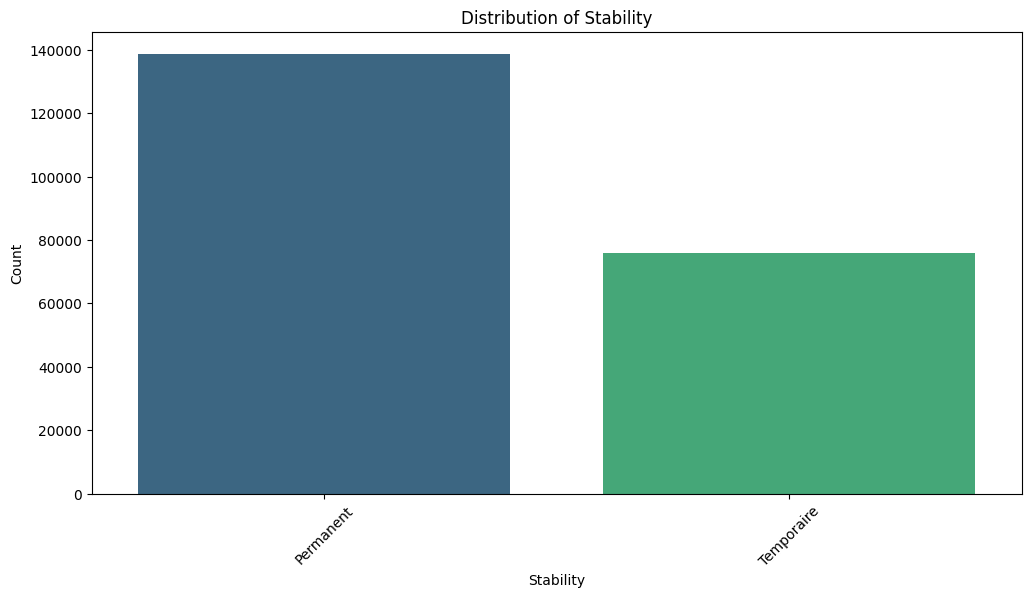

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=final_df, x='Stabilité', palette='viridis', order=[1, 2])
plt.title('Distribution of Stability')
plt.xlabel('Stability')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Permanent', 'Temporaire'], rotation=45)
plt.show()


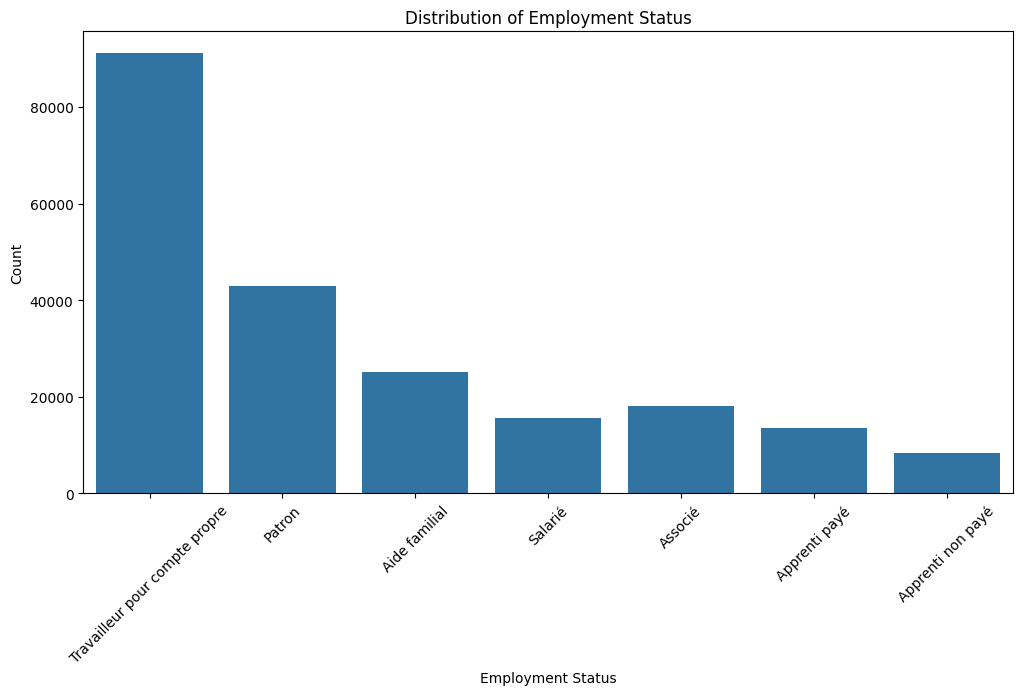

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the labels for employment status
status_labels = {
    '1': 'Patron',
    '2': 'Travailleur pour compte propre',
    '3': 'Salarié',
    '4': 'Apprenti payé',
    '5': 'Apprenti non payé',
    '6': 'Aide familial',
    '7': 'Associé'
}

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=final_df, x='Statut')
plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')

# Update x-ticks with labels
unique_status = final_df['Statut'].astype(str).unique()
tick_labels = [status_labels.get(x, 'Unknown') for x in unique_status]
ax.set_xticks(range(len(tick_labels)))
ax.set_xticklabels(tick_labels, rotation=45)

plt.show()


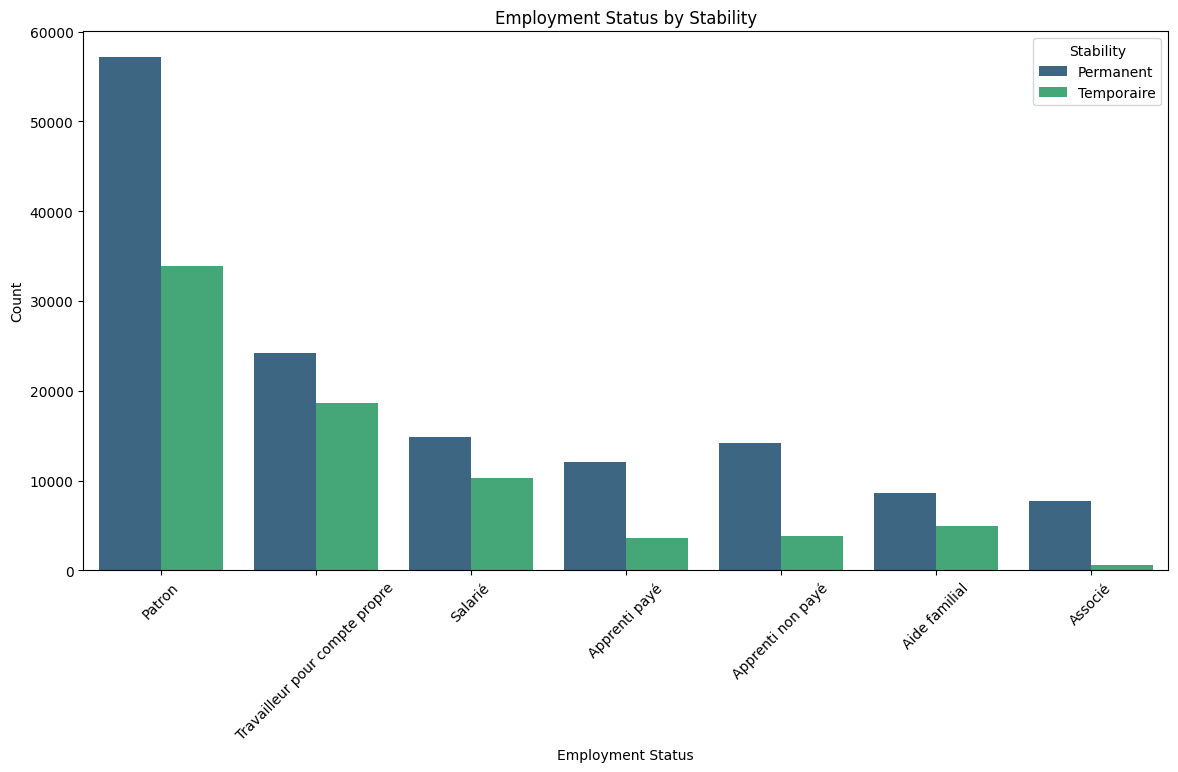

In [ ]:
# Define labels for the Stabilité column
stability_labels = {
    1: 'Permanent',
    2: 'Temporaire'
}

plt.figure(figsize=(14, 7))
sns.countplot(data=final_df, x='Statut', hue='Stabilité', palette='viridis')
plt.title('Employment Status by Stability')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(ticks=range(len(status_labels)), labels=[status_labels.get(x, x) for x in status_labels.keys()], rotation=45)
plt.legend(title='Stability', labels=[stability_labels.get(x, x) for x in stability_labels.keys()])
plt.show()


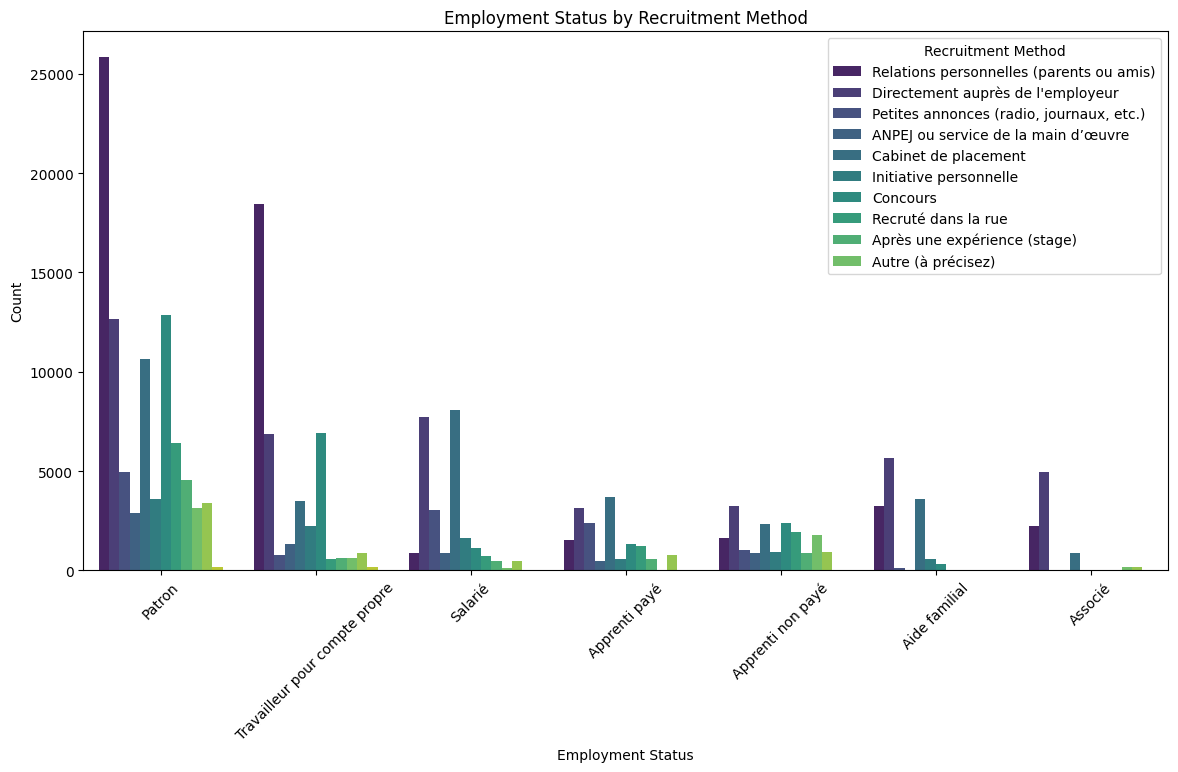

In [ ]:
# Define labels for the Recrutement column
recruitment_labels = {
    1: 'Relations personnelles (parents ou amis)',
    2: 'Directement auprès de l\'employeur',
    3: 'Petites annonces (radio, journaux, etc.)',
    4: 'ANPEJ ou service de la main d’œuvre',
    5: 'Cabinet de placement',
    6: 'Initiative personnelle',
    7: 'Concours',
    8: 'Recruté dans la rue',
    9: 'Après une expérience (stage)',
    10: 'Autre (à précisez)'
}

plt.figure(figsize=(14, 7))
sns.countplot(data=final_df, x='Statut', hue='Recrutement', palette='viridis')
plt.title('Employment Status by Recruitment Method')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(ticks=range(len(status_labels)), labels=[status_labels.get(x, x) for x in status_labels.keys()], rotation=45)
plt.legend(title='Recruitment Method', labels=[recruitment_labels.get(x, x) for x in recruitment_labels.keys()])
plt.show()

In [ ]:
# Remove rows with missing values
final_df = final_df.dropna()

In [109]:
from sklearn.preprocessing import LabelEncoder

# Initialize a dictionary to store label encoders for each feature
label_encoders = {}

# Apply Label Encoding to categorical columns
for column in ['Statut', 'Stabilité', 'Type de contrat', 'Recrutement', 'Nature du paiement']:
    le = LabelEncoder()
    # Use .loc[] to avoid SettingWithCopyWarning
    final_df.loc[:, column] = le.fit_transform(final_df[column].astype(str))
    label_encoders[column] = le


In [110]:
print(final_df.columns)

Index(['individu_id', 'Pourquoi_venu_commune', 'Avez_vous_frequenté_ecole',
       'Lien_avec_chef_ménage', 'Statut_Matrimonial', 'Nationalité', 'Statut',
       'Stabilité', 'Type de contrat', 'Recrutement', 'Nature du paiement'],
      dtype='object')


In [111]:
# Define features and target variable
features = ['Statut', 'Type de contrat', 'Recrutement', 'Nature du paiement']
target = 'Stabilité'

X = final_df[features]
y = final_df[target]

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [113]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(147117, 4) (63051, 4) (147117,) (63051,)


In [114]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [115]:
y_pred = model.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8545


In [119]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['Stable', 'Precarious'])
print(report)

              precision    recall  f1-score   support

      Stable       0.85      0.94      0.89     40613
  Precarious       0.86      0.70      0.77     22438

    accuracy                           0.85     63051
   macro avg       0.86      0.82      0.83     63051
weighted avg       0.86      0.85      0.85     63051



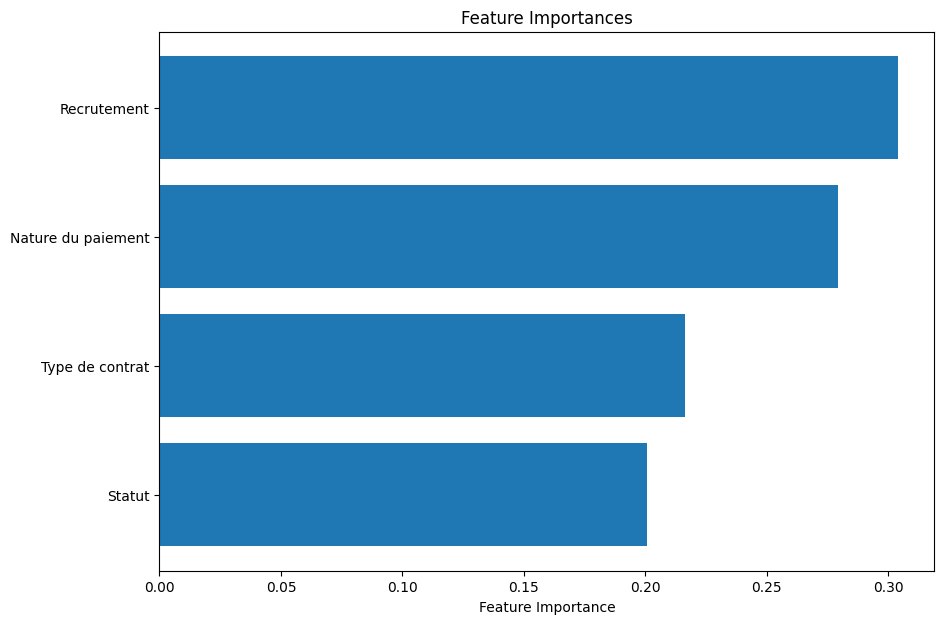

In [116]:

import matplotlib.pyplot as plt
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.title('Feature Importances')
plt.barh(range(X_train.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.show()

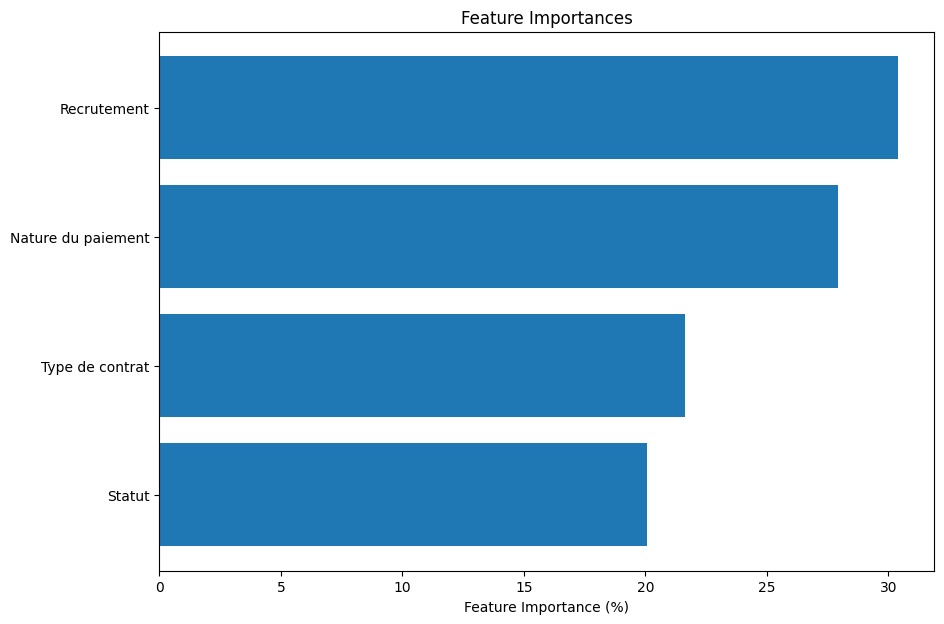

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Calculer les importances des caractéristiques et les indices triés
importances = model.feature_importances_
indices = np.argsort(importances)

# Convertir les importances en pourcentages
importances_percentage = 100.0 * (importances / importances.sum())

# Créer le graphique
plt.figure(figsize=(10, 7))
plt.title('Feature Importances')
plt.barh(range(X_train.shape[1]), importances_percentage[indices], align='center')
plt.yticks(range(X_train.shape[1]), [features[i] for i in indices])
plt.xlabel('Feature Importance (%)')
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(model, 'rmdnAImodel.joblib')